In [10]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

In [2]:
df.train = tbl_df(read.csv("../data/train.csv", stringsAsFactors = FALSE))
df.test = tbl_df(read.csv("../data/test.csv", stringsAsFactors = FALSE))
df.combined = rbind(within(df.train, rm('Id','SalePrice')), within(df.test, rm('Id')))
df.combined2 = rbind(df.combined)

In [3]:
df.combined %>% select(LotFrontage) %>% filter(is.na(.)) %>% summarise(missing.count=n())

# A tibble: 1 × 1
  missing.count
          <int>
1           486

* LotFrontage - Linear feet of street connected to property
* MSSubClass - Identifies the type of dwelling involved in the sale
* MSZoning - Identifies the general zoning classification of the sale
* LotArea - Lot size in square feet
* LotShape - General shape of property 
* LandContour - Flatness of the property
* LotConfig - Lot configuration 
* Neighborhood - Physical locations within Ames city limits
* BldgType - Type of dwelling 
* HouseStyle - Style of dwelling 
* YearBuilt - Original construction date 
* X1stFlrSF - First Floor square feet

In [4]:
df.lot.frontage = df.combined %>% filter(!is.na(LotFrontage)) %>%
select(LotFrontage, MSSubClass, MSZoning, LotArea, LotShape, LandContour, LotConfig, 
       Neighborhood, BldgType, HouseStyle, YearBuilt, X1stFlrSF) %>% na.omit()
head(df.lot.frontage)

# A tibble: 6 × 12
  LotFrontage MSSubClass MSZoning LotArea LotShape LandContour LotConfig
        <int>      <int>    <chr>   <int>    <chr>       <chr>     <chr>
1          65         60       RL    8450      Reg         Lvl    Inside
2          80         20       RL    9600      Reg         Lvl       FR2
3          68         60       RL   11250      IR1         Lvl    Inside
4          60         70       RL    9550      IR1         Lvl    Corner
5          84         60       RL   14260      IR1         Lvl       FR2
6          85         50       RL   14115      IR1         Lvl    Inside
# ... with 5 more variables: Neighborhood <chr>, BldgType <chr>,
#   HouseStyle <chr>, YearBuilt <int>, X1stFlrSF <int>

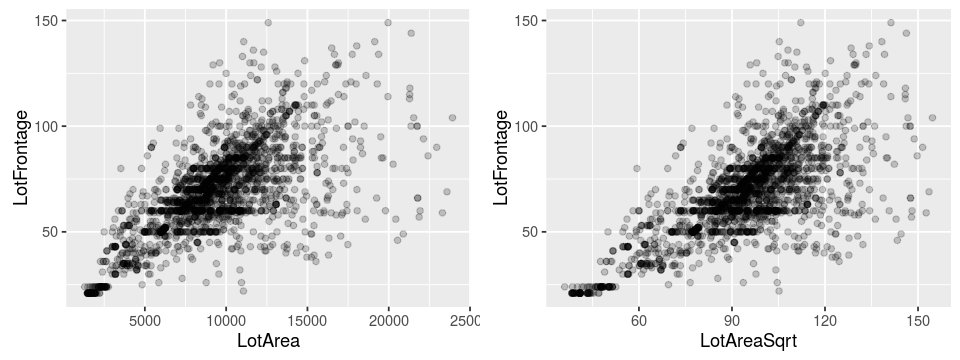

In [12]:
df.lot.frontage.lot.area = df.lot.frontage %>% 
select(LotFrontage, LotArea) %>% 
mutate (LotAreaSqrt=sqrt(LotArea))

options(repr.plot.width = 8, repr.plot.height = 3)

p1 = ggplot(df.lot.frontage.lot.area %>% filter(LotArea < 25000, LotFrontage< 150), aes(LotArea, LotFrontage))
p1 = p1 + geom_point(alpha=0.2)

p2 = ggplot(df.lot.frontage.lot.area %>% filter(LotArea < 25000, LotFrontage< 150), aes(LotAreaSqrt, LotFrontage))
p2 = p2 + geom_point(alpha=0.2)

grid.arrange(p1, p2, layout_matrix=rbind(c(1, 2)))

In [13]:
model.lm <- lm(LotFrontage ~ LotArea, data = df.lot.frontage.lot.area)
summary(model.lm)


Call:
lm(formula = LotFrontage ~ LotArea, data = df.lot.frontage.lot.area)

Residuals:
     Min       1Q   Median       3Q      Max 
-283.826  -11.107   -0.726    9.659  211.918 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.204e+01  7.499e-01   69.39   <2e-16 ***
LotArea     1.774e-03  6.446e-05   27.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.36 on 2428 degrees of freedom
Multiple R-squared:  0.2377,	Adjusted R-squared:  0.2374 
F-statistic: 757.2 on 1 and 2428 DF,  p-value: < 2.2e-16


In [14]:
model.lm <- lm(LotFrontage ~ LotAreaSqrt, data = df.lot.frontage.lot.area)
summary(model.lm)


Call:
lm(formula = LotFrontage ~ LotAreaSqrt, data = df.lot.frontage.lot.area)

Residuals:
     Min       1Q   Median       3Q      Max 
-155.905   -9.856   -0.651    8.220  198.387 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.75182    1.51832   5.106 3.55e-07 ***
LotAreaSqrt  0.64265    0.01541  41.709  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.8 on 2428 degrees of freedom
Multiple R-squared:  0.4174,	Adjusted R-squared:  0.4172 
F-statistic:  1740 on 1 and 2428 DF,  p-value: < 2.2e-16


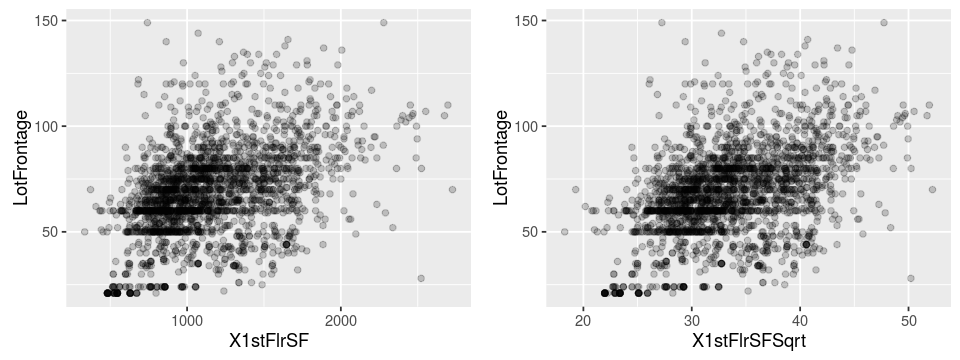

In [15]:
df.lot.frontage.x1st = df.lot.frontage %>% 
select(LotFrontage, X1stFlrSF) %>% 
mutate (X1stFlrSFSqrt=sqrt(X1stFlrSF))

options(repr.plot.width = 8, repr.plot.height = 3)

p1 = ggplot(df.lot.frontage.x1st %>% filter(X1stFlrSF < 3000, LotFrontage< 150), aes(X1stFlrSF, LotFrontage))
p1 = p1 + geom_point(alpha=0.2)

p2 = ggplot(df.lot.frontage.x1st %>% filter(X1stFlrSF < 3000, LotFrontage< 150), aes(X1stFlrSFSqrt, LotFrontage))
p2 = p2 + geom_point(alpha=0.2)

grid.arrange(p1, p2, layout_matrix=rbind(c(1, 2)))

In [16]:
model.lm <- lm(LotFrontage ~ X1stFlrSF, data = df.lot.frontage.x1st)
summary(model.lm)


Call:
lm(formula = LotFrontage ~ X1stFlrSF, data = df.lot.frontage.x1st)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.090 -10.516   0.033   9.989 219.100 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.224405   1.289389   29.64   <2e-16 ***
X1stFlrSF    0.026909   0.001057   25.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.72 on 2428 degrees of freedom
Multiple R-squared:  0.2107,	Adjusted R-squared:  0.2104 
F-statistic: 648.3 on 1 and 2428 DF,  p-value: < 2.2e-16


In [17]:
model.lm <- lm(LotFrontage ~ X1stFlrSFSqrt, data = df.lot.frontage.x1st)
summary(model.lm)


Call:
lm(formula = LotFrontage ~ X1stFlrSFSqrt, data = df.lot.frontage.x1st)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.466 -10.566  -0.054   9.910 220.651 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.73383    2.55494   1.853    0.064 .  
X1stFlrSFSqrt  1.92619    0.07523  25.604   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.69 on 2428 degrees of freedom
Multiple R-squared:  0.2126,	Adjusted R-squared:  0.2123 
F-statistic: 655.6 on 1 and 2428 DF,  p-value: < 2.2e-16


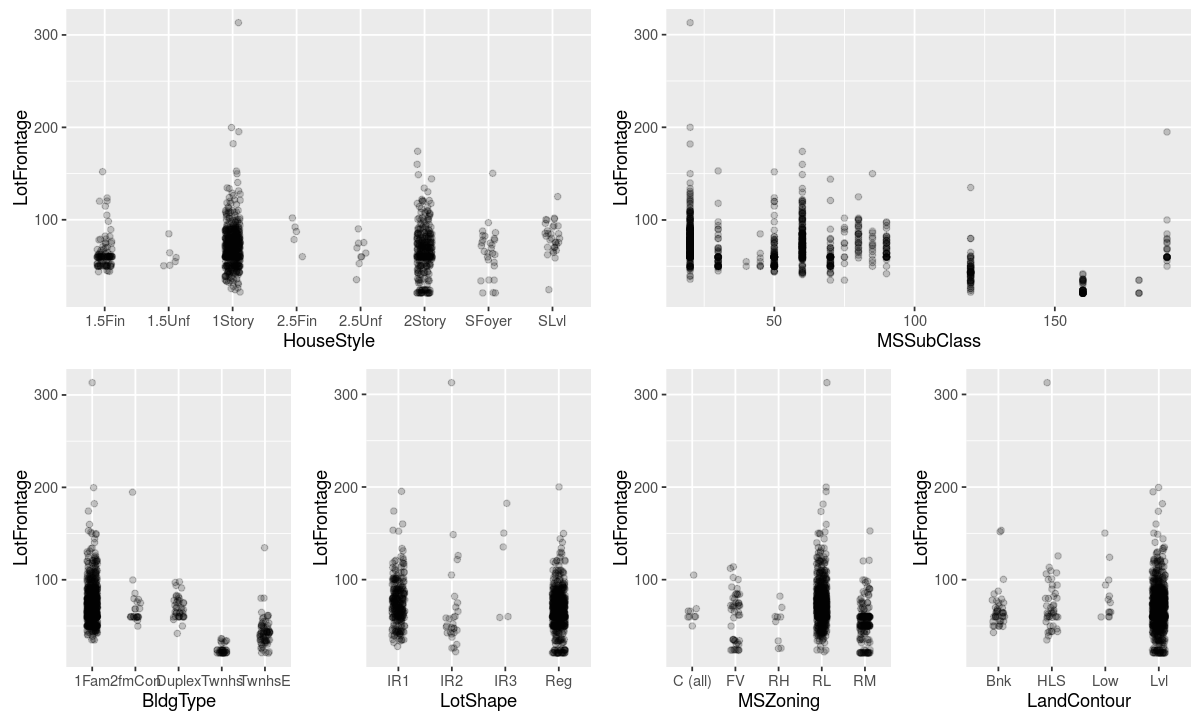

In [44]:
x = df.lot.frontage %>% sample_n(1000) %>%
select(LotFrontage, HouseStyle, BldgType, LotShape, MSSubClass, MSZoning, LandContour)

options(repr.plot.width = 10, repr.plot.height = 6)

p1 = ggplot(x, aes(HouseStyle, LotFrontage))
p1 = p1 + geom_point(alpha=0.2, position=position_jitter(0.3))

p4 = ggplot(x, aes(MSSubClass, LotFrontage))
p4 = p4 + geom_point(alpha=0.2)

p2 = ggplot(x, aes(BldgType, LotFrontage))
p2 = p2 + geom_point(alpha=0.2, position=position_jitter(0.3))

p3 = ggplot(x, aes(LotShape, LotFrontage))
p3 = p3 + geom_point(alpha=0.2, position=position_jitter(0.3))


p5 = ggplot(x, aes(MSZoning, LotFrontage))
p5 = p5 + geom_point(alpha=0.2, position=position_jitter(0.3))

p6 = ggplot(x, aes(LandContour, LotFrontage))
p6 = p6 + geom_point(alpha=0.2, position=position_jitter(0.3))

grid.arrange(p1, p2, p3, p4, p5, p6, layout_matrix=rbind(c(1, 1, 4, 4), c(2, 3, 5, 6)))

In [54]:
model.lm <- lm(LotFrontage ~ HouseStyle, data = df.lot.frontage)
summary(model.lm)$r.squared

[1] 0.02369968

In [55]:
model.lm <- lm(LotFrontage ~ BldgType, data = df.lot.frontage)
summary(model.lm)$r.squared

[1] 0.2790519

In [56]:
model.lm <- lm(LotFrontage ~ LotShape, data = df.lot.frontage)
summary(model.lm)$r.squared

[1] 0.04479834

In [57]:
model.lm <- lm(LotFrontage ~ MSSubClass, data = df.lot.frontage)
summary(model.lm)$r.squared

[1] 0.1737401

In [58]:
model.lm <- lm(LotFrontage ~ MSZoning, data = df.lot.frontage)
summary(model.lm)$r.squared

[1] 0.1374468

In [59]:
model.lm <- lm(LotFrontage ~ LandContour, data = df.lot.frontage)
summary(model.lm)$r.squared

[1] 0.004910214